In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import gridspec
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

In [2]:
data_dir = '/Volumes/JUPITER/Data/SCF72/4K/'

In [3]:
f = os.path.join(data_dir, 'VI-gate_17-19_13_f.bin')
print os.path.isfile(f)

True


In [4]:
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000

In [5]:
df.head()

Gate,0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,...,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1.0
Bias,,,,,,,,,,,,,,,,,,,,,
-10.00,-5.753757e-09,-6.262962e-09,-7.112083e-09,-7.458455e-09,-8.354512e-09,-8.853768e-09,-9.592625e-09,-1.039128e-08,-1.112514e-08,-1.260089e-08,...,-2.765043e-08,-2.766010e-08,-2.763393e-08,-2.758269e-08,-2.752936e-08,-2.726688e-08,-2.516175e-08,-2.440886e-08,-2.353813e-08,-2.439383e-08
-9.95,-5.595659e-09,-6.074780e-09,-6.904561e-09,-7.266612e-09,-8.134788e-09,-8.684189e-09,-9.305621e-09,-1.021155e-08,-1.095125e-08,-1.221988e-08,...,-2.753728e-08,-2.742443e-08,-2.743635e-08,-2.738273e-08,-2.730597e-08,-2.712997e-08,-2.348980e-08,-2.393649e-08,-2.426779e-08,-2.402733e-08
-9.90,-5.454552e-09,-5.877438e-09,-6.703199e-09,-7.025249e-09,-7.841297e-09,-8.355162e-09,-9.232509e-09,-9.956202e-09,-1.067462e-08,-1.198634e-08,...,-2.730732e-08,-2.729274e-08,-2.722129e-08,-2.715345e-08,-2.714516e-08,-2.689565e-08,-2.407127e-08,-2.432960e-08,-2.393707e-08,-2.277652e-08
-9.85,-5.333902e-09,-5.625969e-09,-6.481594e-09,-6.768012e-09,-7.593881e-09,-8.022503e-09,-8.805618e-09,-9.675116e-09,-1.042118e-08,-1.163057e-08,...,-2.713059e-08,-2.713724e-08,-2.702451e-08,-2.702388e-08,-2.689766e-08,-2.674695e-08,-2.479919e-08,-2.500527e-08,-2.291824e-08,-2.331689e-08
-9.80,-5.211484e-09,-5.500960e-09,-6.290821e-09,-6.609694e-09,-7.280104e-09,-7.824494e-09,-8.548150e-09,-9.274096e-09,-1.019288e-08,-1.147377e-08,...,-2.694559e-08,-2.695195e-08,-2.681293e-08,-2.683068e-08,-2.677824e-08,-2.656887e-08,-2.394382e-08,-2.487136e-08,-2.419644e-08,-2.254611e-08


In [6]:
def get_dIdV(df, dV):
    return pd.DataFrame(np.gradient(df,dV)[0], index = df.index, columns = df.columns)

In [7]:
cond = get_dIdV(df, 50e-6)

In [8]:
cond.head()

Gate,0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,...,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1.0
Bias,,,,,,,,,,,,,,,,,,,,,
-10.00,0.000003,0.000004,0.000004,0.000004,0.000004,0.000003,0.000006,0.000004,0.000003,0.000008,...,0.000002,0.000005,0.000004,0.000004,0.000004,0.000003,0.000033,0.000009,-0.000015,0.000007
-9.95,0.000003,0.000004,0.000004,0.000004,0.000005,0.000005,0.000004,0.000004,0.000005,0.000006,...,0.000003,0.000004,0.000004,0.000004,0.000004,0.000004,0.000011,0.000001,-0.000004,0.000016
-9.90,0.000003,0.000004,0.000004,0.000005,0.000005,0.000007,0.000005,0.000005,0.000005,0.000006,...,0.000004,0.000003,0.000004,0.000004,0.000004,0.000004,-0.000013,-0.000011,0.000013,0.000007
-9.85,0.000002,0.000004,0.000004,0.000004,0.000006,0.000005,0.000007,0.000007,0.000005,0.000005,...,0.000004,0.000003,0.000004,0.000003,0.000004,0.000003,0.000001,-0.000005,-0.000003,0.000002
-9.80,0.000003,0.000003,0.000002,0.000003,0.000005,0.000003,0.000004,0.000007,0.000006,0.000005,...,0.000004,0.000004,0.000004,0.000004,0.000003,0.000003,0.000008,0.000012,-0.000004,0.000010


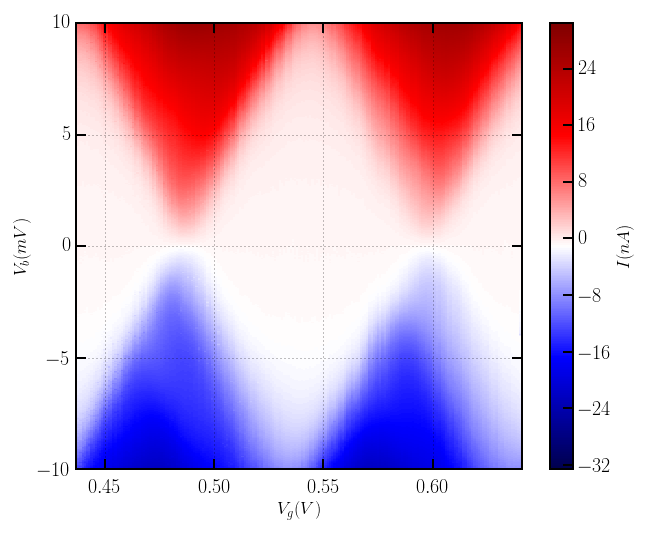

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(df)
im = ax.imshow(df*1e9, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
ax.set_xlim(0.437,0.641)
ax.grid()
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')

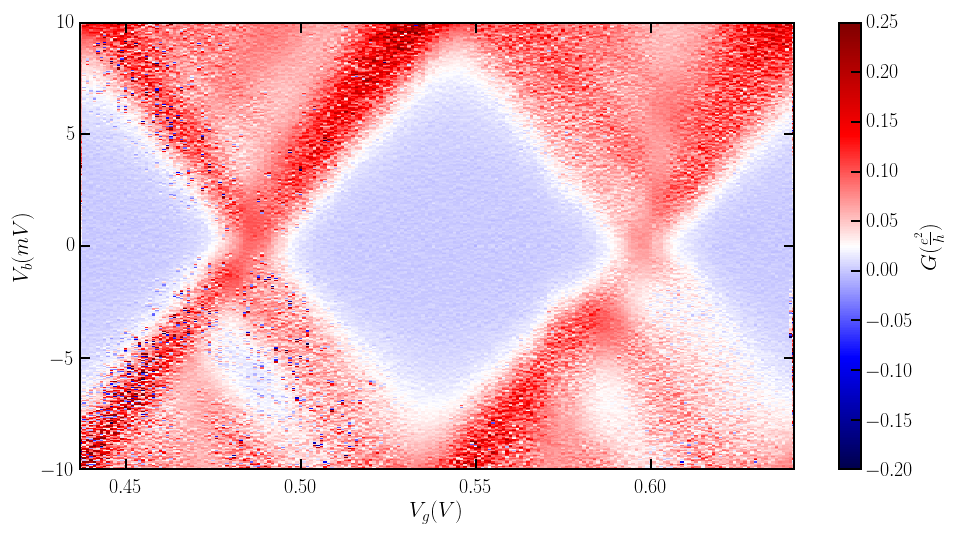

In [21]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond/3.875e-5, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.25, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$', fontsize = 22)
ax.set_ylabel(r'$V_b (mV)$', fontsize = 22)
#ax.grid()
ax.set_xlim(0.437,0.641)
# ax.set_title('B=0T')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$', fontsize = 22)
fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/chapter2/diamond_example.png', dpi=300)

In [22]:
icut = df.iloc[:,562:568].mean(axis = 1)
ccut = cond.iloc[:,562:568].mean(axis = 1)

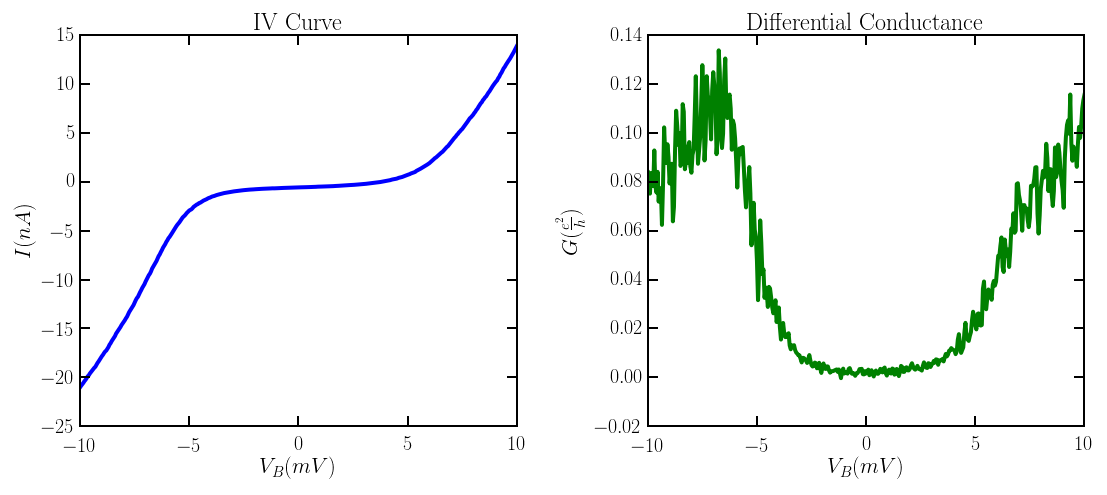

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,7))
ax1.plot(df.index.values, icut*1e9)
ax1.set_xlabel(r'$V_B (mV)$', fontsize = 22)
ax1.set_ylabel(r'$I (nA)$', fontsize = 22)
ax1.set_title('IV Curve', fontsize = 24)

ax2.plot(df.index.values, ccut/3.875e-5, 'g')
ax2.set_xlabel(r'$V_B (mV)$', fontsize = 22)
ax2.set_ylabel(r'$G (\frac{e^2}{h})$', fontsize = 22)
ax2.set_title('Differential Conductance', fontsize=24)

fig.subplots_adjust(wspace=.3)
fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/chapter2/bias_sweep.png', dpi=300)

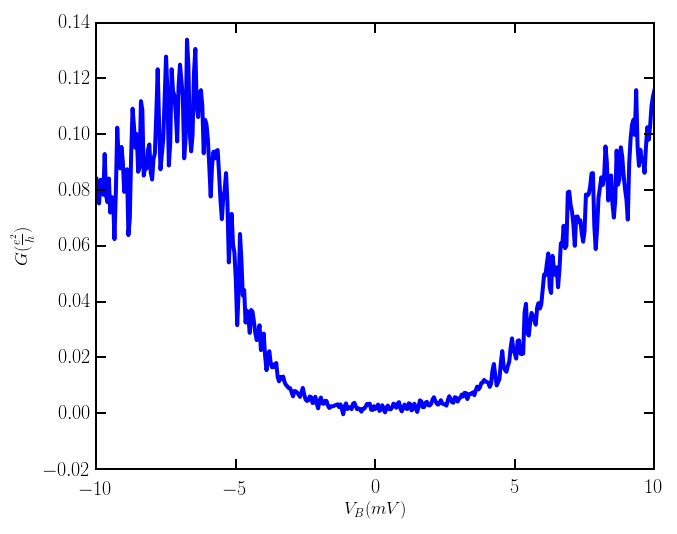

In [70]:
fig, ax = plt.subplots()
ax.plot(df.index.values, ccut/3.875e-5)
ax.set_xlabel(r'$V_B (mV)$')
ax.set_ylabel(r'$G (\frac{e^2}{h})$')

In [9]:
data_dir = '/Volumes/JUPITER/Data/fm_dots/SCF72/'
os.listdir(data_dir)

['4K_BI_17-19_13_c_5mV_0mV.pkl',
 '4K_BI_17-19_13_d_5mV_0mV.pkl',
 '4K_BI_17-19_13_e_5mV_0mV.pkl',
 '4K_BI_17-19_13_i_10mV_0mV.pkl',
 '4K_gate-swp_17-29_13_b1.pk2',
 '4K_gate-swp_17-29_13_b1.pkl',
 '4K_VI-gate_17-19_13_f.pkl',
 '4K_VI-gate_17-19_13_g.pkl',
 '4K_VI-gate_17-19_13_g_n4T.pkl',
 '4K_VI-gate_23-21_13_f.pkl',
 'RT_gate-swp_15-23_13_a.pkl',
 '4K_VI-gate_17-19_13_g_cond.pkl',
 '4K_VI-gate_17-19_13_g_noise-amp.pkl',
 '4K_VI-gate_17-19_13_g_n4T_cond.pkl',
 '4K_VI-gate_17-19_13_g_n4T_noise-amp.pkl',
 'figures']

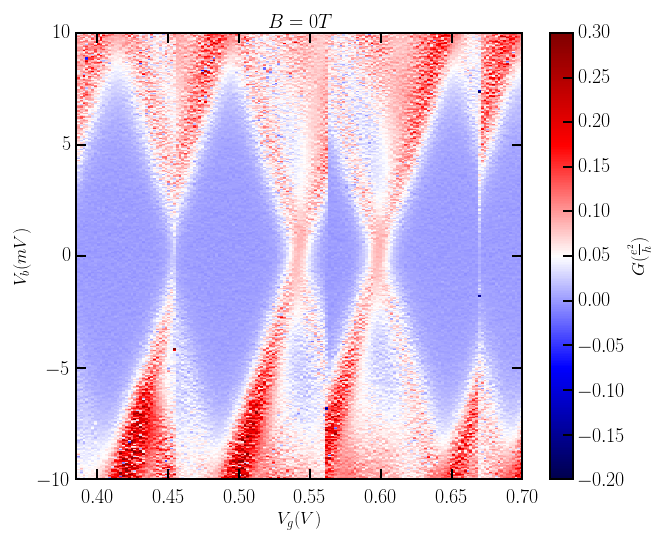

In [37]:
f = os.path.join(data_dir, '4K_VI-gate_17-19_13_g.pkl')
df = pd.read_pickle(f)

fig, ax = plt.subplots(1,1)
cond = get_dIdV(df, 50e-6)/3.875e-5
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
#ax.grid()
ax.set_xlim(0.385,0.7)
ax.set_title('$B = 0T$')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

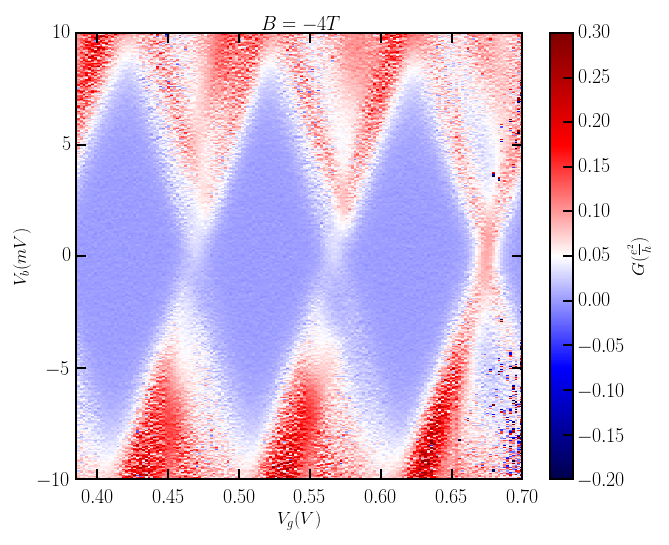

In [36]:
f = os.path.join(data_dir, '4K_VI-gate_17-19_13_g_n4T.pkl')
df = pd.read_pickle(f)

fig, ax = plt.subplots(1,1)
cond = get_dIdV(df, 50e-6)/3.875e-5
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
#ax.grid()
ax.set_xlim(0.385,0.7)
ax.set_title('$B = -4T$')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

In [30]:
data_dir = '/Volumes/JUPITER/Data/fm_dots/SCF96/'
os.listdir(data_dir)

['4K_gate-i_9-12_23_a_1.0mV.pkl',
 '4K_gate-i_9-12_23_b_1.0mV.pkl',
 '4K_gate-i_9-12_23_e_2.0mV.pkl',
 '4K_vi-gate_9-12_23_f.pkl',
 '4K_vi-gate_9-12_23_f_2T.pkl',
 '4K_bi_9-12_23_a_25mV_5500mV.pkl',
 '4K_bi_9-12_23_c_10mV_5500mV.pkl',
 '4K_bi_9-12_23_d_25mV_7000mV.pkl',
 '4K_gate-i_18-20_23_b_2.0mV.pkl',
 '4K_gate-i_15-16_23_a_2.0mV.pkl',
 '4K_gate-i_13-18_23_a_2.0mV.pkl',
 '4K_gate-i_16-17_23_b_2.0mV.pkl',
 '4K_vi-gate_16-17_23_a.pkl',
 '4K_vi-gate_16-17_23_a_2T.pkl',
 '4K_vi-bswp_16-17_23_c_10000.0mV.pkl',
 '4K_bi_16-17_23_multiple-runs_b_10mV_15000mV.pkl',
 '4K_bi_16-17_23_multiple-runs_c_-20mV_7000mV.pkl',
 '4K_bi_16-17_23_multiple-runs_f_25mV_6000mV.pkl',
 '4K_vi-bswp_16-17_23_c_cond.pkl',
 '4K_vi-bswp_16-17_23_c_noise-amp.pkl',
 'figures',
 '4K_vi-gate_9-12_23_f_2T_cond.pkl',
 '4K_vi-gate_9-12_23_f_2T_noise-amp.pkl',
 '4K_vi-gate_16-17_23_a_cond.pkl',
 '4K_vi-gate_16-17_23_a_noise-amp.pkl',
 '4K_vi-gate_16-17_23_a_2T_noise-amp.pkl',
 '4K_vi-gate_16-17_23_a_2T_cond.pkl',
 '4K_vi-b

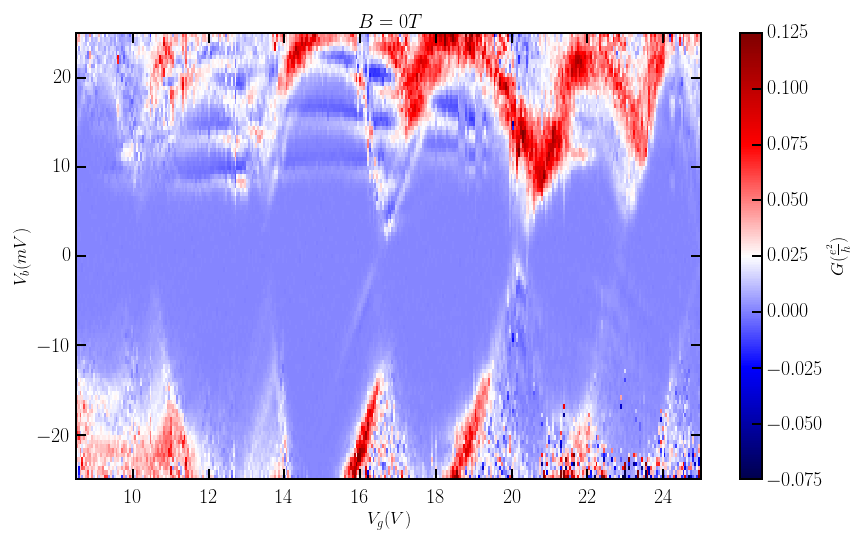

In [65]:
f = os.path.join(data_dir, '4K_vi-gate_16-17_23_a.pkl')
df = pd.read_pickle(f)

fig, ax = plt.subplots(1,1, figsize = (14,8))
cond = get_dIdV(df, 500e-6)/3.875e-5
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.075, vmax = 0.125, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
#ax.grid()
ax.set_xlim(8.5,25)
ax.set_title('$B = 0T$')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

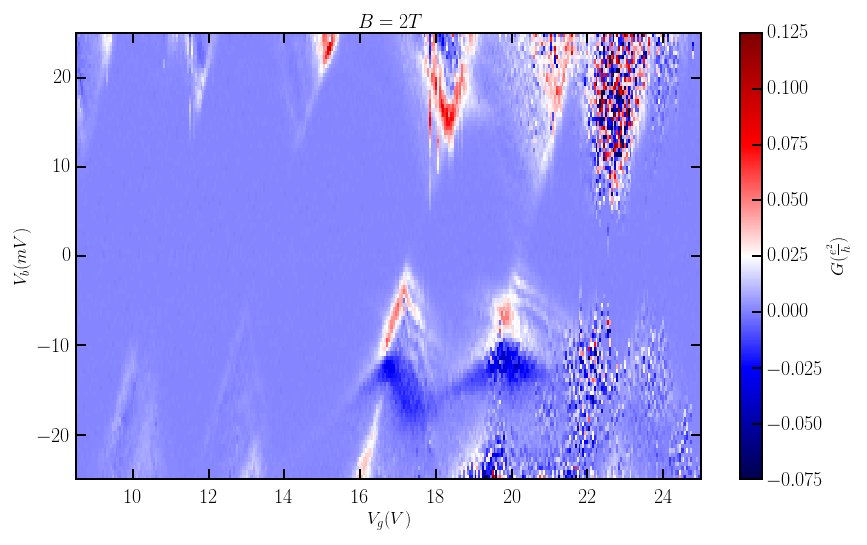

In [64]:
f = os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T.pkl')
df = pd.read_pickle(f)

fig, ax = plt.subplots(1,1, figsize = (14,8))
cond = get_dIdV(df, 500e-6)/3.875e-5
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.075, vmax = 0.125, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
#ax.grid()
ax.set_xlim(8.5, 25)
ax.set_title('$B = 2T$')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

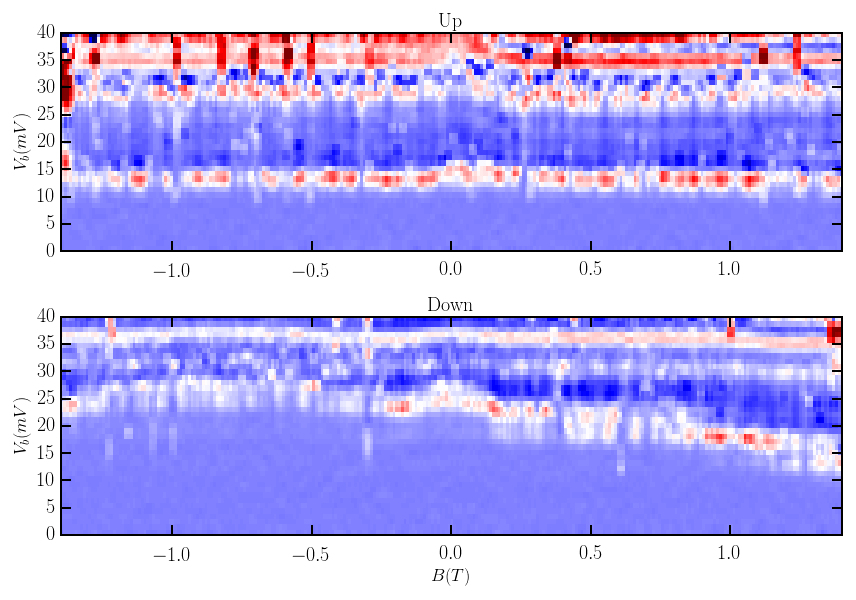

In [82]:
f = '4K_vi-bswp_16-17_23_c_10000.0mV.pkl'
df = pd.read_pickle(os.path.join(data_dir,f))

dV = 1e-3
cond = get_dIdV(df,dV)

ind = np.where(np.diff(df.columns)==0)[0]
cuts = np.concatenate(([0],ind,[len(df.columns)-1]), axis=0)

fig, ax = plt.subplots(2,1, figsize=(14,9))

limits = [df.columns[cuts[0]], df.columns[cuts[1]], df.index.min(), df.index.max()]

condup = cond.iloc[:,cuts[0]:cuts[1]]/3.875e-5
im0 = ax[0].imshow(pd.rolling_mean(condup, 3, axis=1), extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.01, vmax = 0.02,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_g (V)$')
ax[0].set_ylabel(r'$V_b (mV)$')
ax[0].set_title('Up')
ax[0].set_xlim(-1.4, 1.4)

conddown = cond.iloc[:,cuts[1]:cuts[-1]]/3.875e-5

limits = [df.columns[cuts[-1]], df.columns[cuts[1]], df.index.min(), df.index.max()]
im1 = ax[1].imshow(pd.rolling_mean(conddown[conddown.columns[::-1]], 3, axis = 1), extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.01, vmax = 0.02,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_g (V)$')
ax[1].set_ylabel(r'$V_b (mV)$')
ax[1].set_xlabel(r'$B (T)$')
ax[1].set_title('Down')
ax[1].set_xlim(-1.4, 1.4)

fig.subplots_adjust(hspace = 0.3)

In [175]:
def get_data_ps(filename):
    """ returns a pandas array with the 2d data from the binary file
        tagged with relevant information from the header file """
    
    
    df = lvdt.get_data_2d(filename) # get data
    df['Bias'] *= 1000.0
    
    dt = df['dt'].mean()
    M, N = df.ix[:,'i0':].shape
    t = np.arange(0,N)*dt # time series (s)
    freqs = np.fft.fftfreq(N, dt) # frequency (Hz)
    idx = np.argsort(freqs) # sort arrays with this
    freqs = freqs[idx]
    
    # get the white noise spectrum
    white = np.zeros(N)
    i = 0.0
    for s in df[np.abs(df['Bias'])<1e-6].ix[:,'i0':].values:
        white += np.abs(np.fft.fft(s))**2
        i +=1.0
    white = white[idx]/i
    
    # setup dataframe
    cols = ['Bias', 'Iavg']
    cols.extend([f for f in freqs[N/2:]])
    psdf = pd.DataFrame(np.zeros((M,N/2+2)), columns = cols)
    psdf[['Bias','Iavg']] = df[['Bias','Iavg']]
    for j, s in enumerate(df.ix[:,'i0':].values):
        ps = np.abs(np.fft.fft(s))**2
        psdf.iloc[j,2:] = ps[idx][N/2:] - white[N/2:]
    return psdf.groupby(psdf['Bias']).mean()

In [176]:
def noise_model(x, amp, a, b, current):
    return amp*np.power(current, b)/np.power(x, a)

In [215]:
from lmfit import Model, Parameter

model = Model(noise_model, independent_vars=['x'])
params = model.make_params()
params['current'].vary = False
params['amp'].min = 0.0
params['amp'].value = 1.0
params['b'].vary = True
params['b'].value = 2.0
params['b'].min = 0.0
params['a'].vary = False
params['a'].value = 1.0

In [216]:
data_dir = '/Volumes/JUPITER/Data/fm_dots/SCF96/'
og_dir = '/Volumes/JUPITER/Data/SCF96/q3/'

In [217]:
# load current data and calculate conductance from pkl

f = os.path.join(data_dir, '4K_vi-gate_16-17_23_a.pkl')
df = pd.read_pickle(f)
cond = get_dIdV(df, 500e-6)/3.875e-5

In [218]:
gate = df.columns.values
filelist = [os.path.join(og_dir, 'vi-gate_16-17_23_a_{0:.0f}.bin'.format(g*1000)) for g in gate]
print np.all([os.path.isfile(f) for f in filelist]) # if this is false there is going to be trouble

True


In [219]:
offset = df.loc[0.0, :].mean()
ampdf = pd.DataFrame(np.zeros(df.shape), index = df.index, columns = df.columns)
bdf = pd.DataFrame(np.zeros(df.shape), index = df.index, columns = df.columns)

for j, f in enumerate(filelist[0:2]):
    psdf = get_data_ps(f)

    current = psdf['Iavg'] - offset
    psdf.drop(psdf.columns[[0, 1]], axis=1, inplace=True) # drop the current and f=0 columns
    # params['b'].value = 2.0
    
    #A = np.zeros(len(df.index))
    for i, bias in enumerate(df.index):
        params['current'].value = current[bias] # set current
        result = model.fit(psdf.ix[bias,:], params, x=psdf.columns)
        ampdf.iloc[i,j] = result.params['amp'].value
        bdf.iloc[i,j] = result.params['b'].value

In [220]:
ampdf.head()

Gate,5.0,5.05,5.1,5.15,5.2,5.25,5.3,5.35,5.4,5.45,...,29.55,29.6,29.65,29.7,29.75,29.8,29.85,29.9,29.95,30.0
Bias,,,,,,,,,,,,,,,,,,,,,
-25.0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-24.5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-24.0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-23.5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-23.0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
cond.to_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_cond.pkl'))
ampdf.to_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_noise-amp.pkl'))

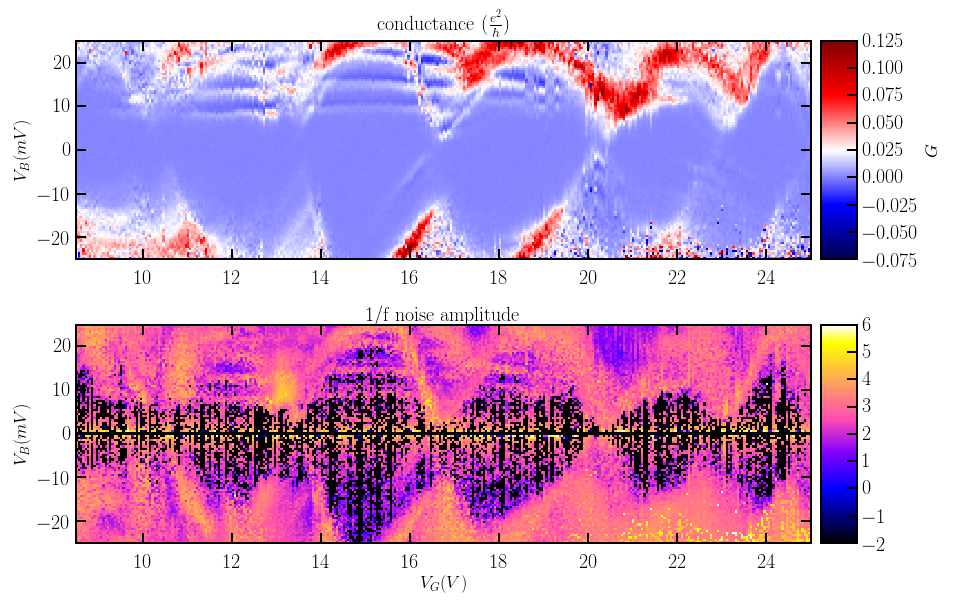

In [128]:
cond = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_cond.pkl'))
ampdf = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_noise-amp.pkl'))

fig = plt.figure(figsize = (14,9))
gs = gridspec.GridSpec(2, 2, height_ratios=(1, 1), width_ratios=(20, 1))
gs.update(wspace=0.025, hspace=0.3)
axes = fig.add_subplot(gs[0,0])
limits = lvdt.df_extent(ampdf)

im0 = axes.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.075, vmax = 0.125, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title(r'conductance ($\frac{e^2}{h}$)')
axes.set_xlim(8.5, 25)
cax = fig.add_subplot(gs[0,1])
cb0 = plt.colorbar(im0, cax = cax)
cb0.set_label(r'$G$')

axes = fig.add_subplot(gs[1,0])
im1 = axes.imshow(np.log10(ampdf), extent = limits, 
               cmap = plt.cm.gnuplot2, vmin = -2, vmax = 6, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
axes.set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title('1/f noise amplitude')
axes.set_xlim(8.5, 25)
cax = fig.add_subplot(gs[1,1])
cb1 = plt.colorbar(im1, cax = cax)
# cb1.set_label(r'$\log_{10}(A)$')

In [129]:
f = os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T.pkl')
df = pd.read_pickle(f)
cond = get_dIdV(df, 500e-6)/3.875e-5

In [130]:
gate = df.columns.values
filelist = [os.path.join(og_dir, 'vi-gate_16-17_23_a_2T_{0:.0f}.bin'.format(g*1000)) for g in gate]
print np.all([os.path.isfile(f) for f in filelist]) # if this is false there is going to be trouble

True


In [133]:
offset = df.loc[0.0, :].mean()
ampdf = pd.DataFrame(np.zeros(df.shape), index = df.index, columns = df.columns)

for j, f in enumerate(filelist):
    psdf = get_data_ps(f)

    current = psdf['Iavg'] - offset
    psdf.drop(psdf.columns[[0, 1]], axis=1, inplace=True) # drop the current and f=0 columns

    #A = np.zeros(len(df.index))
    for i, bias in enumerate(df.index):
        params['current'].value = current[bias] # set current
        result = model.fit(psdf.ix[bias,:], params, x=psdf.columns)
        ampdf.iloc[i,j] = result.params['amp'].value

In [135]:
cond.to_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T_cond.pkl'))
ampdf.to_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T_noise-amp.pkl'))

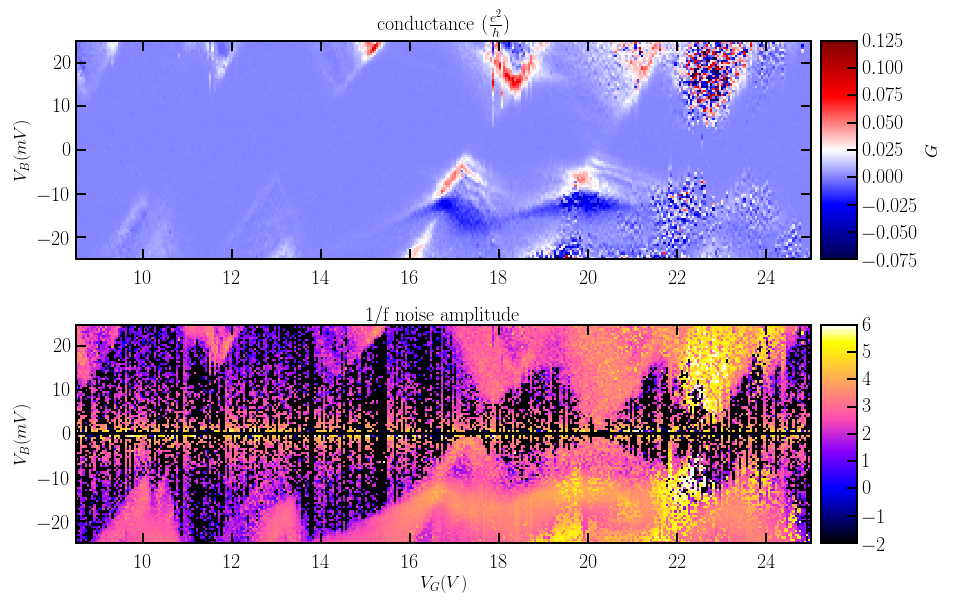

In [136]:
cond = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T_cond.pkl'))
ampdf = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T_noise-amp.pkl'))

fig = plt.figure(figsize = (14,9))
gs = gridspec.GridSpec(2, 2, height_ratios=(1, 1), width_ratios=(20, 1))
gs.update(wspace=0.025, hspace=0.3)
axes = fig.add_subplot(gs[0,0])
limits = lvdt.df_extent(ampdf)

im0 = axes.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.075, vmax = 0.125, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title(r'conductance ($\frac{e^2}{h}$)')
axes.set_xlim(8.5, 25)
cax = fig.add_subplot(gs[0,1])
cb0 = plt.colorbar(im0, cax = cax)
cb0.set_label(r'$G$')

axes = fig.add_subplot(gs[1,0])
im1 = axes.imshow(np.log10(ampdf), extent = limits, 
               cmap = plt.cm.gnuplot2, vmin = -2, vmax = 6, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
axes.set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title('1/f noise amplitude')
axes.set_xlim(8.5, 25)
cax = fig.add_subplot(gs[1,1])
cb1 = plt.colorbar(im1, cax = cax)
# cb1.set_label(r'$\log_{10}(A)$')

In [9]:
f = '4K_vi-bswp_16-17_23_c_10000.0mV.pkl'
df = pd.read_pickle(os.path.join(data_dir,f))

dV = 1e-3
cond = get_dIdV(df,dV)

ind = np.where(np.diff(df.columns)==0)[0]
cuts = np.concatenate(([0],ind,[len(df.columns)-1]), axis=0)

In [10]:
field = df.columns.values
filelist = [os.path.join(og_dir, 'vi-bswp_16-17_23_c_{0:.0f}.bin'.format(g*1000)) for g in field]
print np.all([os.path.isfile(f) for f in filelist]) # if this is false there is going to be trouble

True


In [11]:
def get_bswp_ps(filename, ends):
    """ returns a pandas array with the 2d data from the binary file
        tagged with relevant information from the header file """
    
    
    df = lvdt.get_data_2d(filename) # get data
    df = df.iloc[ends[0]:ends[1], :]
    df.index = np.arange(0, df.shape[0])
    df['Bias'] *= 1000.0
    
    dt = df['dt'].mean()
    M, N = df.ix[:,'i0':].shape
    t = np.arange(0,N)*dt # time series (s)
    freqs = np.fft.fftfreq(N, dt) # frequency (Hz)
    idx = np.argsort(freqs) # sort arrays with this
    freqs = freqs[idx]
    
    # get the white noise spectrum
    white = np.zeros(N)
    i = 0.0
    for s in df[np.abs(df['Bias'])<1e-6].ix[:,'i0':].values:
        white += np.abs(np.fft.fft(s))**2
        i +=1.0
    white = white[idx]/i
    
    # setup dataframe
    cols = ['Bias', 'Iavg']
    cols.extend([f for f in freqs[N/2:]])
    psdf = pd.DataFrame(np.zeros((M,N/2+2)), columns = cols)
    psdf[['Bias','Iavg']] = df[['Bias','Iavg']]
    for j, s in enumerate(df.ix[:,'i0':].values):
        ps = np.abs(np.fft.fft(s))**2
        psdf.iloc[j,2:] = ps[idx][N/2:] - white[N/2:]
    return psdf.groupby(psdf['Bias']).mean()

In [12]:
offset = df.loc[0.0, :].mean()
ampup = pd.DataFrame(np.zeros(df.shape), index = df.index, columns = df.columns)
ampdown = pd.DataFrame(np.zeros(df.shape), index = df.index, columns = df.columns)

for j, f in enumerate(filelist):
    psdf = get_bswp_ps(f, (0,82))

    current = psdf['Iavg'] - offset
    psdf.drop(psdf.columns[[0, 1]], axis=1, inplace=True) # drop the current and f=0 columns

    #A = np.zeros(len(df.index))
    for i, bias in enumerate(df.index):
        params['current'].value = current[bias] # set current
        result = model.fit(psdf.ix[bias,:], params, x=psdf.columns)
        ampup.iloc[i,j] = result.params['amp'].value
        
for j, f in enumerate(filelist):
    psdf = get_bswp_ps(f, (82,None))
    
    current = psdf['Iavg'] - offset
    psdf.drop(psdf.columns[[0, 1]], axis=1, inplace=True) # drop the current and f=0 columns

    #A = np.zeros(len(df.index))
    for i, bias in enumerate(df.index):
        params['current'].value = current[bias] # set current
        result = model.fit(psdf.ix[bias,:], params, x=psdf.columns)
        ampdown.iloc[i,j] = result.params['amp'].value

In [17]:
cond.to_pickle(os.path.join(data_dir, '4K_vi-bswp_16-17_23_c_cond.pkl'))
ampup.to_pickle(os.path.join(data_dir, '4K_vi-bswp_16-17_23_c_noise-amp-up.pkl'))
ampdown.to_pickle(os.path.join(data_dir, '4K_vi-bswp_16-17_23_c_noise-amp-down.pkl'))

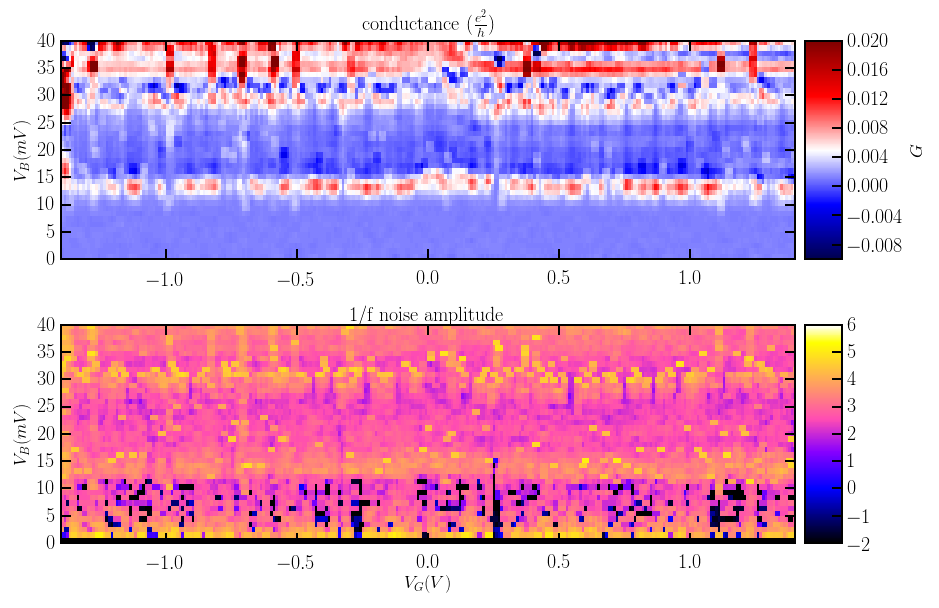

In [27]:
cond = pd.read_pickle(os.path.join(data_dir, '4K_vi-bswp_16-17_23_c_cond.pkl'))
ampup = pd.read_pickle(os.path.join(data_dir, '4K_vi-bswp_16-17_23_c_noise-amp-up.pkl'))

condup = cond.iloc[:,cuts[0]:cuts[1]]/3.875e-5
ampup = ampup.groupby(ampup.columns, axis = 1).mean()

fig = plt.figure(figsize = (14,9))
gs = gridspec.GridSpec(2, 2, height_ratios=(1, 1), width_ratios=(20, 1))
gs.update(wspace=0.025, hspace=0.3)
axes = fig.add_subplot(gs[0,0])
limits = lvdt.df_extent(ampup)

im0 = axes.imshow(pd.rolling_mean(condup, 3, axis = 1), extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.01, vmax = 0.02,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title(r'conductance ($\frac{e^2}{h}$)')
axes.set_xlim(-1.4, 1.4)
cax = fig.add_subplot(gs[0,1])
cb0 = plt.colorbar(im0, cax = cax)
cb0.set_label(r'$G$')

axes = fig.add_subplot(gs[1,0])
im1 = axes.imshow(np.log10(pd.rolling_mean(ampup, 3, axis = 1)), extent = limits, 
               cmap = plt.cm.gnuplot2, vmin = -2, vmax = 6, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
axes.set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title('1/f noise amplitude')
axes.set_xlim(-1.4, 1.4)
cax = fig.add_subplot(gs[1,1])
cb1 = plt.colorbar(im1, cax = cax)
# cb1.set_label(r'$\log_{10}(A)$')

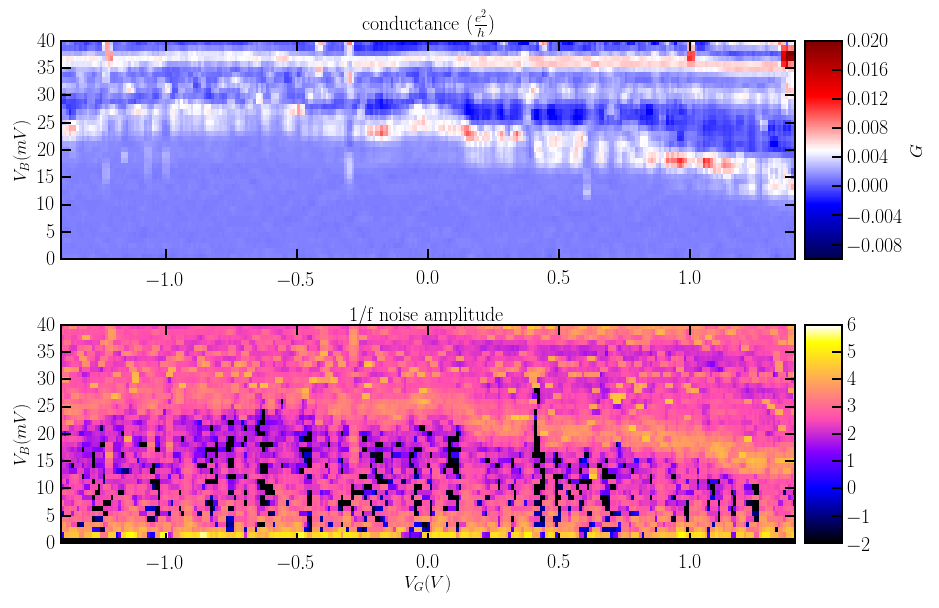

In [28]:
cond = pd.read_pickle(os.path.join(data_dir, '4K_vi-bswp_16-17_23_c_cond.pkl'))
ampdown = pd.read_pickle(os.path.join(data_dir, '4K_vi-bswp_16-17_23_c_noise-amp-down.pkl'))

conddown = cond.iloc[:,cuts[1]:cuts[-1]]/3.875e-5
ampdown = ampdown.groupby(ampdown.columns, axis = 1).mean()

fig = plt.figure(figsize = (14,9))
gs = gridspec.GridSpec(2, 2, height_ratios=(1, 1), width_ratios=(20, 1))
gs.update(wspace=0.025, hspace=0.3)
axes = fig.add_subplot(gs[0,0])
limits = lvdt.df_extent(ampdown)

im0 = axes.imshow(pd.rolling_mean(conddown[conddown.columns[::-1]], 3, axis = 1), extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.01, vmax = 0.02,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title(r'conductance ($\frac{e^2}{h}$)')
axes.set_xlim(-1.4, 1.4)
cax = fig.add_subplot(gs[0,1])
cb0 = plt.colorbar(im0, cax = cax)
cb0.set_label(r'$G$')

axes = fig.add_subplot(gs[1,0])
im1 = axes.imshow(np.log10(pd.rolling_mean(ampdown, 3, axis = 1)), extent = limits, 
               cmap = plt.cm.gnuplot2, vmin = -2, vmax = 6, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
axes.set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title('1/f noise amplitude')
axes.set_xlim(-1.4, 1.4)
cax = fig.add_subplot(gs[1,1])
cb1 = plt.colorbar(im1, cax = cax)
# cb1.set_label(r'$\log_{10}(A)$')

In [35]:
# going to make some time series plots and a slice of the conductance data

f = os.path.join(data_dir, '4K_vi-gate_16-17_23_a.pkl')
df = pd.read_pickle(f)
cond = get_dIdV(df, 500e-6)/3.875e-5

In [36]:
gate = df.columns.values
filelist = [os.path.join(og_dir, 'vi-gate_16-17_23_a_{0:.0f}.bin'.format(g*1000)) for g in gate]
print np.all([os.path.isfile(f) for f in filelist]) # if this is false there is going to be trouble

True


In [59]:
f = filelist[320]
psdf = get_data_ps(f)
freq = psdf.columns[2:]

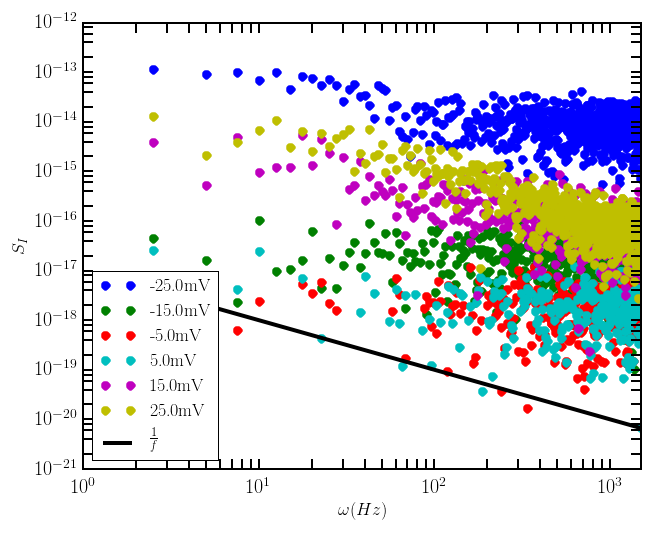

In [83]:
fig, ax = plt.subplots(1,1)

for i in np.linspace(0, 100, 6, dtype = np.int):
    ax.plot(freq, psdf.iloc[i, 2:], '.', label = '{0}mV'.format(psdf.index[i]))
ax.plot(freq, 1e-17/freq.values, c='k', label = r'$\frac{1}{f}$')
ax.set_xscale('log')
ax.set_xlim(None,1500)
ax.set_ylabel(r'$S_I$')
ax.set_yscale('log')
ax.set_xlabel('$\omega (Hz)$')
ax.legend(loc = 3)

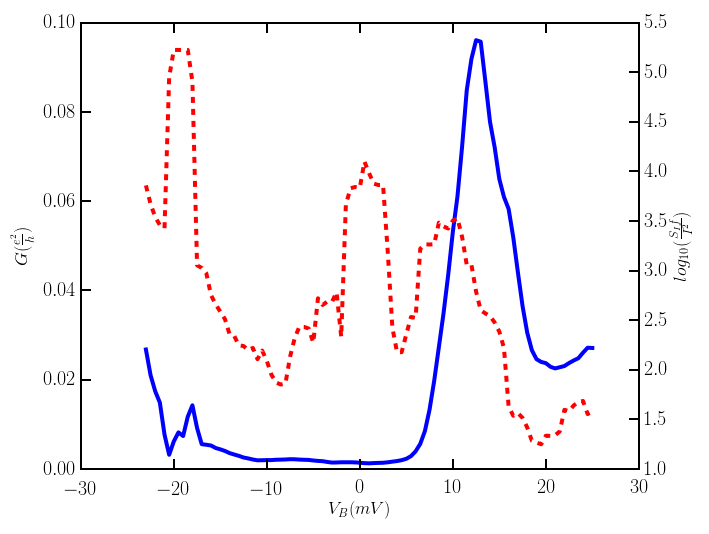

In [118]:
ampdf = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_noise-amp.pkl'))
cond = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_cond.pkl'))

ampdf = pd.rolling_mean(ampdf, 5)
cond = pd.rolling_mean(cond, 5)

fig, ax = plt.subplots(1,1)
ax.plot(cond.index, cond[21.0])
ax.set_ylabel(r'$G (\frac{e^2}{h})$')
ax.set_xlabel('$V_B (mV)$')
ax2 = ax.twinx()
ax2.set_ylabel(r'$log_{10}(\frac{S_I f}{I^2})$')
ax2.plot(ampdf.index, np.log10(ampdf[21.0]), 'r--')

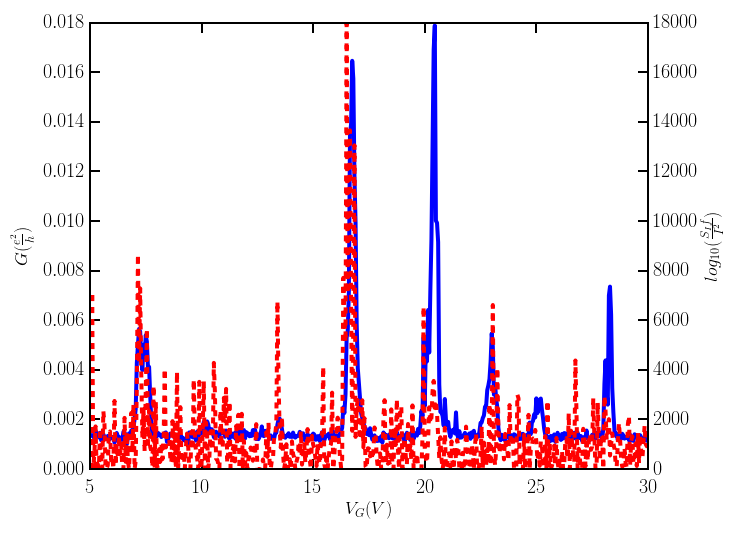

In [142]:
ampdf = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_noise-amp.pkl'))
cond = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_cond.pkl'))

c = cond.iloc[54:59,:].mean()
a = ampdf.iloc[54:59,:].mean()

fig, ax = plt.subplots(1,1)
ax.set_ylabel(r'$G (\frac{e^2}{h})$')
ax.set_xlabel('$V_G (V)$')
ax2 = ax.twinx()
ax2.set_ylabel(r'$log_{10}(\frac{S_I f}{I^2})$')
ax2.plot(a.index, a, 'r--')
ax.plot(c.index, c)

In [155]:
def one_over_f(f, N):
    return N/f

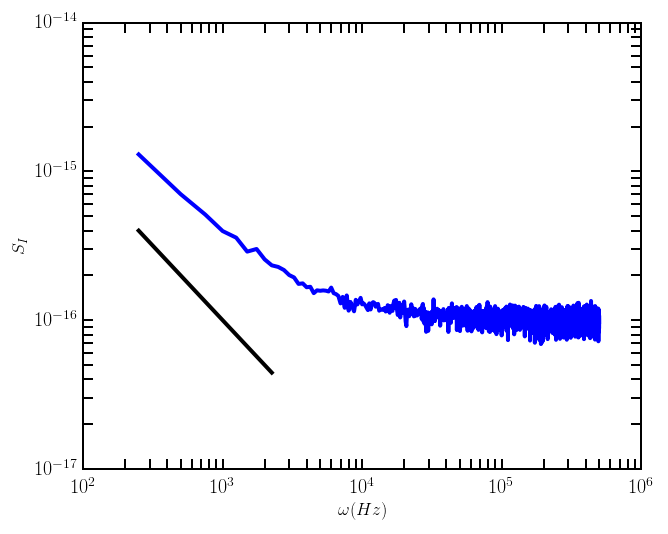

In [174]:
fig, ax = plt.subplots(1,1)

freq = np.linspace(0, 500000, 2000)
noise = one_over_f(freq, 3e-13)+1e-16+1e-17*np.random.randn(*freq.shape)
ax.plot(freq, noise)
ax.set_xscale('log')
#ax.set_xlim(None,1500)
ax.set_ylabel(r'$S_I$')
ax.set_yscale('log')
ax.set_xlabel('$\omega (Hz)$')
ax.plot(freq[:10], 1e-13/freq[:10], c='k')
#ax.legend(loc = 3)